<a href="https://colab.research.google.com/github/vinods03/deep_learning/blob/main/CNN_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [3]:
base_dir = '/content/drive/MyDrive/Covid19-dataset/train'

In [4]:
import os

dataset_a = []
for item in os.listdir(base_dir):
  dataset_a.append(os.path.join(base_dir, item))

dataset_a

['/content/drive/MyDrive/Covid19-dataset/train/Covid',
 '/content/drive/MyDrive/Covid19-dataset/train/Normal',
 '/content/drive/MyDrive/Covid19-dataset/train/Viral Pneumonia']

In [5]:
dataset_train = []
for i in range(0,len(dataset_a)):
  for j in os.listdir(dataset_a[i]):
    dataset_train.append(os.path.join(dataset_a[i],j))

dataset_train
print(len(dataset_train))

251


In [6]:
# convert one img into an array

from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Covid19-dataset/train/Viral Pneumonia/012.jpeg', target_size = (256,256))
img = img_to_array(img)
img = img/255
img
print(img.shape)

(256, 256, 3)


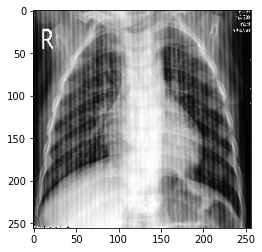

In [7]:
# convert array back to image

import matplotlib.pyplot as plt
plt.imshow(img)

In [8]:
translate = {'Normal':0, 'Viral Pneumonia':1, 'Covid':2}

In [9]:
# create image_array and image_label

image_array = []
image_label = []

for i in dataset_train:
  img = load_img(i, target_size = (256,256))
  img = img_to_array(img)
  img = img/255
  image_array.append(img)
  label = i.split('/')[-2]
  image_label.append(translate[label])

In [10]:
set(image_label)

{0, 1, 2}

In [11]:
# image_array

In [12]:
import numpy as np
image_array = np.array(image_array)
image_label = np.array(image_label)
print(image_array.shape)
print(image_label.shape)

(251, 256, 256, 3)
(251,)


In [13]:
test_dir = '/content/drive/MyDrive/Covid19-dataset/test'

In [14]:
dataset_b = []

for item in os.listdir(test_dir):
  dataset_b.append(os.path.join(test_dir,item))

dataset_b

['/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia',
 '/content/drive/MyDrive/Covid19-dataset/test/Normal',
 '/content/drive/MyDrive/Covid19-dataset/test/Covid']

In [15]:
dataset_test = []

for i in range(0,len(dataset_b)):
  for j in os.listdir(dataset_b[i]):
    dataset_test.append(os.path.join(dataset_b[i],j))

dataset_test

['/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia/0107.jpeg',
 '/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia/0108.jpeg',
 '/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia/0118.jpeg',
 '/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia/0114.jpeg',
 '/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia/0112.jpeg',
 '/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia/0104.jpeg',
 '/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia/0105.jpeg',
 '/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia/0109.jpeg',
 '/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia/0113.jpeg',
 '/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia/0119.jpeg',
 '/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia/0101.jpeg',
 '/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia/0102.jpeg',
 '/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia/0115.jpeg',
 '/content/drive/MyDrive/Covid19-datas

In [16]:
test_array = []
test_label = []

for item in dataset_test:
  img = load_img(item, target_size = (256,256))
  img = img_to_array(img)
  img = img/255
  test_array.append(img)
  label = item.split('/')[-2]
  test_label.append(translate[label])

set(test_label)

{0, 1, 2}

In [17]:
test_array = np.array(test_array)
test_label = np.array(test_label)

print(test_array.shape)
print(test_label.shape)

(66, 256, 256, 3)
(66,)


In [18]:
c = len(set(image_label))
print('Number of classes:',c)

Number of classes: 3


In [19]:
# Build model

from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Flatten, GlobalMaxPooling2D, Dropout, Dense
from tensorflow.keras.models import Model

In [20]:
# image_array[0].shape
i = Input(shape = image_array[0].shape)

x = Conv2D(32, (3,3), strides = 2, activation = 'relu', padding = 'valid')(i)
x = BatchNormalization()(x)

x = Conv2D(64, (3,3), strides = 2, activation = 'relu', padding = 'valid')(x)
x = BatchNormalization()(x)

x = Conv2D(128, (3,3), strides = 2, activation = 'relu', padding = 'valid')(x)
x = BatchNormalization()(x)

x = Conv2D(128, (3,3), strides = 2, activation = 'relu', padding = 'valid')(x)
x = BatchNormalization()(x)

x = Conv2D(128, (3,3), strides = 2, activation = 'relu', padding = 'valid')(x)
x = BatchNormalization()(x)

x = Conv2D(128, (3,3), strides = 2, activation = 'relu', padding = 'valid')(x)
x = BatchNormalization()(x)

# x = Conv2D(128, (3,3), strides = 2, activation = 'relu', padding = 'valid')(x)
# x = BatchNormalization()(x) 

# x = Flatten()(x)
x = GlobalMaxPooling2D()(x)

x = Dropout(0.2)(x)
x = Dense(128, activation = 'relu')(x)

x = Dropout(0.2)(x)
x = Dense(c, activation = 'softmax')(x)

m = Model(i,x)

In [21]:
# compile and fit the model

# 0.001 is the default learning rate
# m.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# opt = tf.keras.optimizers.Adam(0.001)
opt = tf.keras.optimizers.Adam(0.0001)
# opt = tf.keras.optimizers.Adam(0.00001) didnt help, accuracy and val_accuracy went down drastically
m.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

r = m.fit(image_array, image_label, validation_data = (test_array, test_label), epochs = 20)

Epoch 1/20
8/8 [==============================] - 12s 100ms/step - loss: 1.9024 - accuracy: 0.3984 - val_loss: 1.0988 - val_accuracy: 0.2727
Epoch 2/20
8/8 [==============================] - 0s 35ms/step - loss: 0.7646 - accuracy: 0.7450 - val_loss: 1.0970 - val_accuracy: 0.3939
Epoch 3/20
8/8 [==============================] - 0s 32ms/step - loss: 0.4895 - accuracy: 0.7968 - val_loss: 1.0947 - val_accuracy: 0.3939
Epoch 4/20
8/8 [==============================] - 0s 33ms/step - loss: 0.3570 - accuracy: 0.8805 - val_loss: 1.0940 - val_accuracy: 0.3939
Epoch 5/20
8/8 [==============================] - 0s 33ms/step - loss: 0.2932 - accuracy: 0.8924 - val_loss: 1.0933 - val_accuracy: 0.3939
Epoch 6/20
8/8 [==============================] - 0s 31ms/step - loss: 0.2579 - accuracy: 0.9203 - val_loss: 1.0937 - val_accuracy: 0.3939
Epoch 7/20
8/8 [==============================] - 0s 32ms/step - loss: 0.1392 - accuracy: 0.9482 - val_loss: 1.0961 - val_accuracy: 0.3939
Epoch 8/20
8/8 [=========

In [22]:
batch_size = 24
# data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)
# data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1)
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    # horizontal_flip=True,
    # rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2)
train_generator = data_generator.flow(image_array, image_label, batch_size)
steps_per_epoch = image_array.shape[0] // batch_size
r = m.fit_generator(train_generator, validation_data = (test_array, test_label), steps_per_epoch = steps_per_epoch, epochs = 40)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/40
10/10 [==============================] - 3s 276ms/step - loss: 1.0222 - accuracy: 0.6476 - val_loss: 2.1380 - val_accuracy: 0.3939
Epoch 2/40
10/10 [==============================] - 3s 285ms/step - loss: 1.0078 - accuracy: 0.6333 - val_loss: 2.6979 - val_accuracy: 0.3939
Epoch 3/40
10/10 [==============================] - 3s 272ms/step - loss: 0.9585 - accuracy: 0.6432 - val_loss: 2.9984 - val_accuracy: 0.3939
Epoch 4/40
10/10 [==============================] - 3s 270ms/step - loss: 0.8375 - accuracy: 0.6960 - val_loss: 3.3335 - val_accuracy: 0.3939
Epoch 5/40
10/10 [==============================] - 3s 288ms/step - loss: 0.8754 - accuracy: 0.6792 - val_loss: 3.7164 - val_accuracy: 0.3939
Epoch 6/40
10/10 [==============================] - 3s 274ms/step - loss: 0.7663 - accuracy: 0.7137 - val_loss: 4.0519 - val_accuracy: 0.3939
Epoch 7/40
10/10 [==============================] - 3s 288ms/step - loss: 0.7443 - accuracy: 0.7375 - val_loss: 4.2832 - val_accuracy: 0.3939
Epoch 

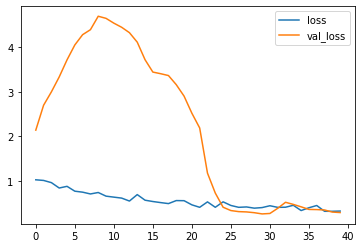

In [23]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

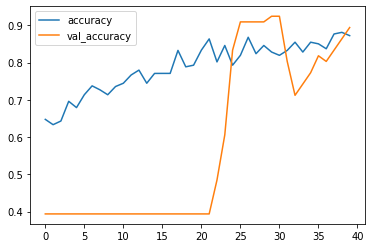

In [24]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [25]:
y_test_pred = m.predict(test_array)
# y_test_pred

In [26]:
y_test_pred_decoded = []

for i in range(0,len(y_test_pred)):
  y_test_pred_decoded.append(y_test_pred[i].argmax())

# y_test_pred_decoded

In [27]:
import sklearn.metrics as metrics
accuracy = metrics.accuracy_score(test_label, y_test_pred_decoded)
error = 1 - accuracy
precision = metrics.precision_score(test_label, y_test_pred_decoded, average = 'weighted')
recall = metrics.recall_score(test_label, y_test_pred_decoded, average = 'weighted')
f1 = metrics.f1_score(test_label, y_test_pred_decoded, average = 'weighted')
cm = metrics.confusion_matrix(test_label, y_test_pred_decoded)

print('accuracy:', accuracy)
print('error:', error)
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)

print('\n')
print('Confusion Matrix:')
print('\n')
print(cm)

from sklearn.metrics import classification_report
print(classification_report(test_label, y_test_pred_decoded))

accuracy: 0.8939393939393939
error: 0.10606060606060608
precision: 0.907070707070707
recall: 0.8939393939393939
f1: 0.8922558922558922


Confusion Matrix:


[[14  6  0]
 [ 1 19  0]
 [ 0  0 26]]
              precision    recall  f1-score   support

           0       0.93      0.70      0.80        20
           1       0.76      0.95      0.84        20
           2       1.00      1.00      1.00        26

    accuracy                           0.89        66
   macro avg       0.90      0.88      0.88        66
weighted avg       0.91      0.89      0.89        66



In [28]:
reverse_translate = {0:'Normal', 1:'Viral Pneumonia', 2:'Covid'}

In [29]:
for i in range(0,len(test_label)):
  print('Test image number:',i, '       ','Actual Value:', reverse_translate[test_label[i]], '        ', 'Predicted Value:', reverse_translate[y_test_pred_decoded[i]])

Test image number: 0         Actual Value: Viral Pneumonia          Predicted Value: Viral Pneumonia
Test image number: 1         Actual Value: Viral Pneumonia          Predicted Value: Viral Pneumonia
Test image number: 2         Actual Value: Viral Pneumonia          Predicted Value: Normal
Test image number: 3         Actual Value: Viral Pneumonia          Predicted Value: Viral Pneumonia
Test image number: 4         Actual Value: Viral Pneumonia          Predicted Value: Viral Pneumonia
Test image number: 5         Actual Value: Viral Pneumonia          Predicted Value: Viral Pneumonia
Test image number: 6         Actual Value: Viral Pneumonia          Predicted Value: Viral Pneumonia
Test image number: 7         Actual Value: Viral Pneumonia          Predicted Value: Viral Pneumonia
Test image number: 8         Actual Value: Viral Pneumonia          Predicted Value: Viral Pneumonia
Test image number: 9         Actual Value: Viral Pneumonia          Predicted Value: Viral Pneumonia

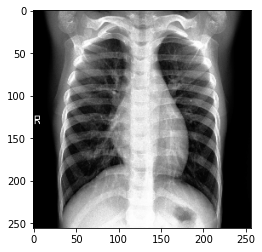

In [31]:
# Lets take a closer look at some of the images

plt.imshow(test_array[39]) # Test image number: 39        Actual Value: Normal          Predicted Value: Viral Pneumonia